In [2]:
import numpy as np
import sys
import muram as mio  
import matplotlib.pyplot as plt

In [ ]:
# For the SSD data with ch and corona - you can use this path:
pathsource = '/dat/milic/MURAM_SSD_ch_co_25x25x25Mm/'
path3D = pathsource + '3D/'
path2D = pathsource + '2D/'

In [17]:
# For the other SSD data, with higher resolution and photospher only, use this path:
pathsource = '/dat/milic/'
path3D = pathsource + '3D/3D_full_subdomain/' # Sorry I was rearranging something there
path2D = pathsource + '2D/'

In [ ]:
# IF you used the first one, it's FULL snaps - so use MuramSnap
#cube = mio.MuramSnap(path3D, 0)
# But for the other one, they are so called SUBSNAPS - so you use MuramSubSnap
cube = mio.MuramSunSnap(path3D, 0)

In [23]:
cube.available

[]

In [6]:
# Mean temperature is an interesting one: 
Tmean = np.mean(cube.Temp.transpose(1,2,0), axis=(0,1)) # I could have done this averaging faster, but this is to be more explicit how the axis are rotated

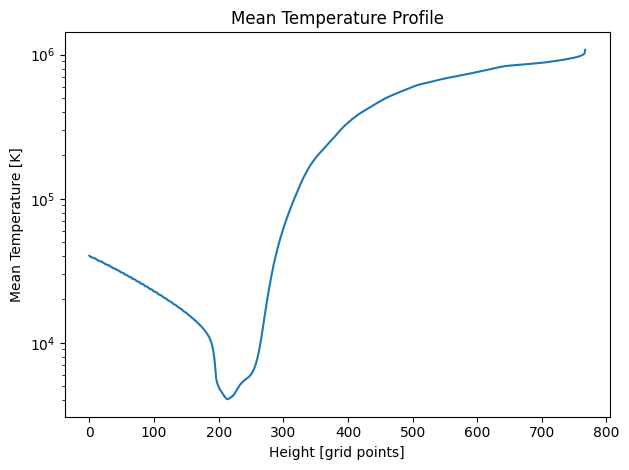

In [21]:
plt.semilogy(Tmean)
plt.xlabel('Height [grid points]')
plt.ylabel('Mean Temperature [K]')
plt.title('Mean Temperature Profile')
plt.tight_layout()
plt.savefig('Tmean_profile.png', dpi=150, bbox_inches='tight')

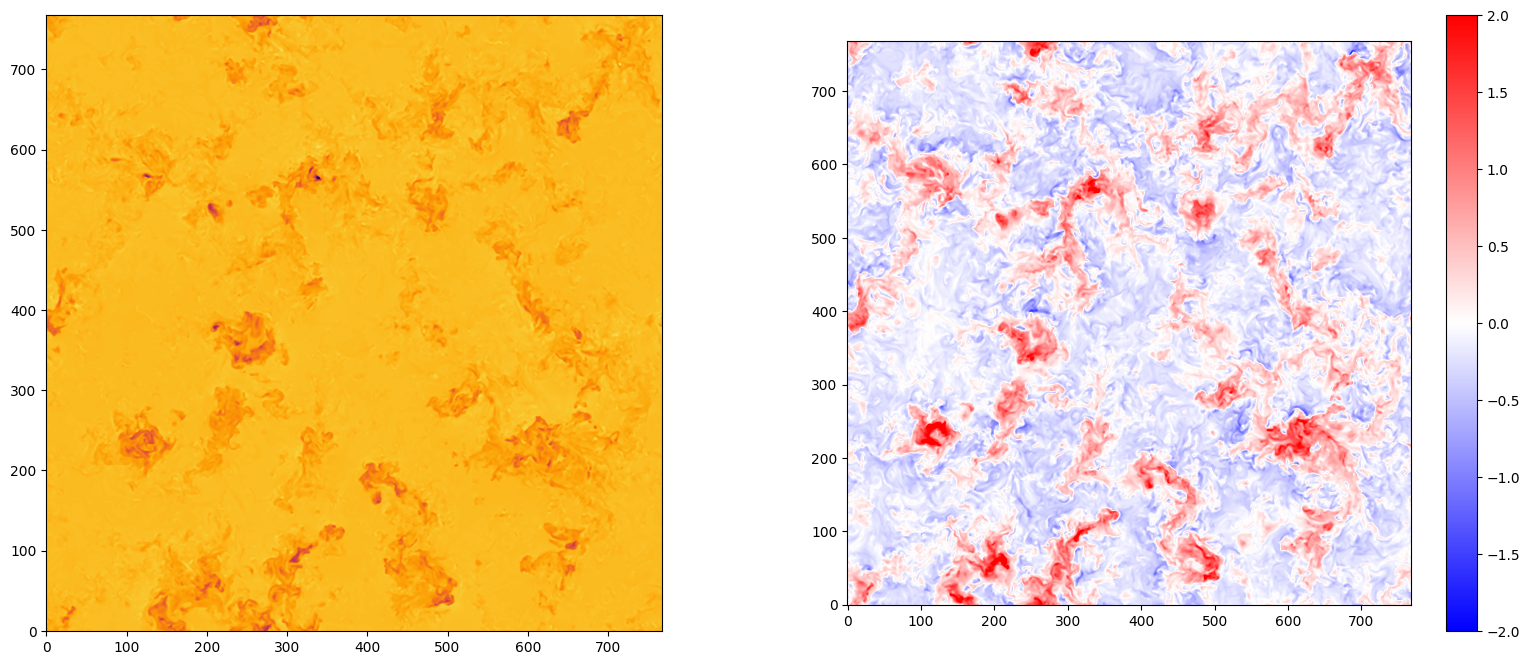

In [7]:
# Taking into account that z is the first axis
# x,y plots:
# Two subpanels, temperature and vz at the bottom:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.imshow(cube.Temp[0,:,:].T, origin='lower', cmap='inferno')
plt.subplot(1,2,2)
plt.imshow(-cube.vx[0,:,:].T/1E5, origin='lower', cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()